In [1]:
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Download the data


In [3]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

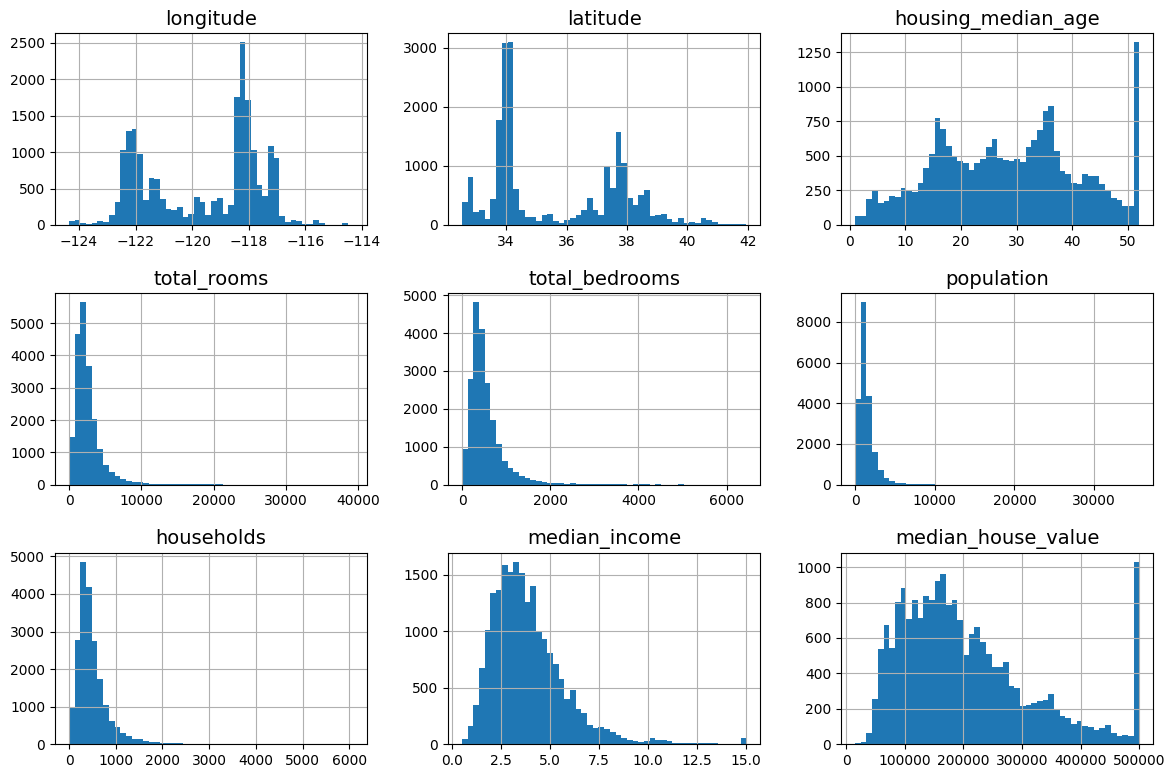

In [9]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

In [10]:
## Create a test set
import numpy as np
def shuffle_and_split(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) # Embaralha os indices
    test_set_size = int(len(data)* test_ratio) # Define o tamanho do conjunto de teste
    test_indices = shuffled_indices[:test_set_size] # Define os indices do conjunto de teste
    train_indices = shuffled_indices[test_set_size:] # Define os indices do conjunto de treino
    return data.iloc[train_indices], data.iloc[test_indices] # Retorna os conjuntos de treino e teste


In [11]:

from zlib import crc32

def test_set_chceck(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_chceck(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]


In [12]:
# Se usar o indice como identificador precisamos garantir que novos dados serão adicionados no final do dataset
#Nesse exemplo vamos tentar usar caracteristicas mais estáveis para ser os identificadores
#Por exemplo a latitude e longitude que serao as mesmas durante alguns anos

housing_with_id = housing.reset_index() # Adiciona um indice
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [13]:
#Tambem podemos usar o train_test_split
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [14]:
test_set['total_bedrooms'].isnull().sum()

np.int64(44)

In [15]:
from scipy.stats import binom

sample_size = 1000
ratio_female = 0.511
proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)
print(proba_too_small + proba_too_large)

0.10736798530929942


<Axes: >

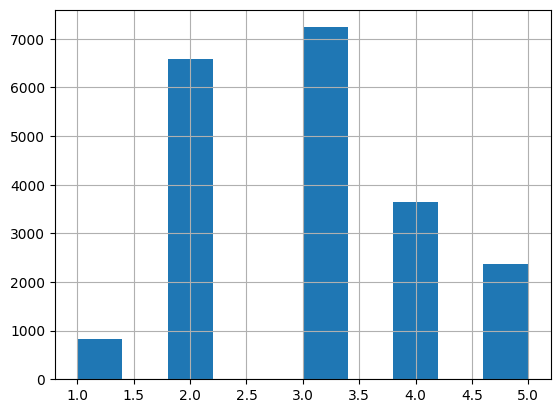

In [16]:
#Fazendo umas melhores analises das rendeas medias. Logo vamos criar um atributo para melhor analisar
import pandas as pd
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing["income_cat"].hist()

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [18]:
#Analisando as proporçoes das categorias de renda
strat_test_set_n["income_cat"].value_counts() / len(strat_test_set_n)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [19]:
#Removendo o income cat para que os dados voltem ao normal
for set_ in (strat_train_set_n, strat_test_set_n):
    set_.drop("income_cat", axis=1, inplace=True)

C:\Users\vish8\AppData\Local\Temp\ipykernel_11468\1370689405.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat", axis=1, inplace=True)
C:\Users\vish8\AppData\Local\Temp\ipykernel_11468\1370689405.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat", axis=1, inplace=True)


## Explorando e visualiznado dados


In [20]:
housing = strat_train_set_n.copy()

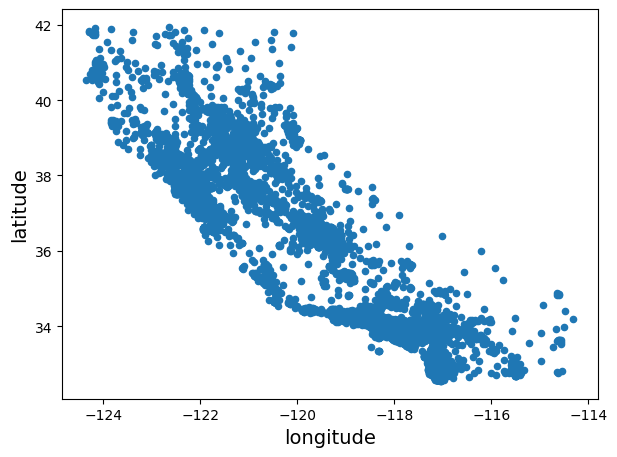

In [21]:
#Criando um grafico com latitude e longitude
housing.plot(kind = 'scatter', x ='longitude', y= 'latitude')
save_fig("bad_visualization_plot")
plt.show()

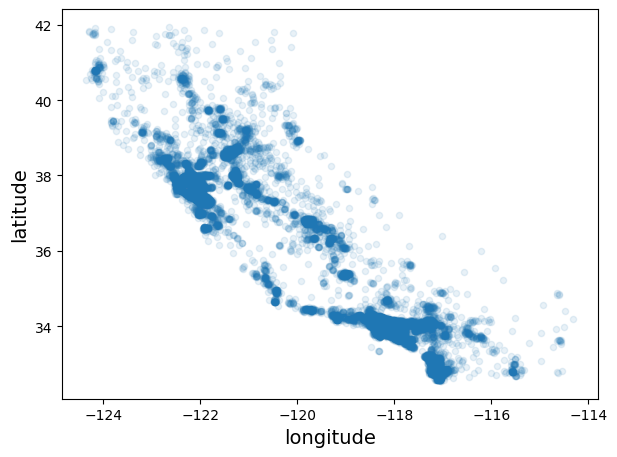

In [22]:
#Criando um grafico com latitude e longitude
housing.plot(kind = 'scatter', x ='longitude', y= 'latitude', alpha = 0.1)
save_fig("bad_visualization_plot")
plt.show()

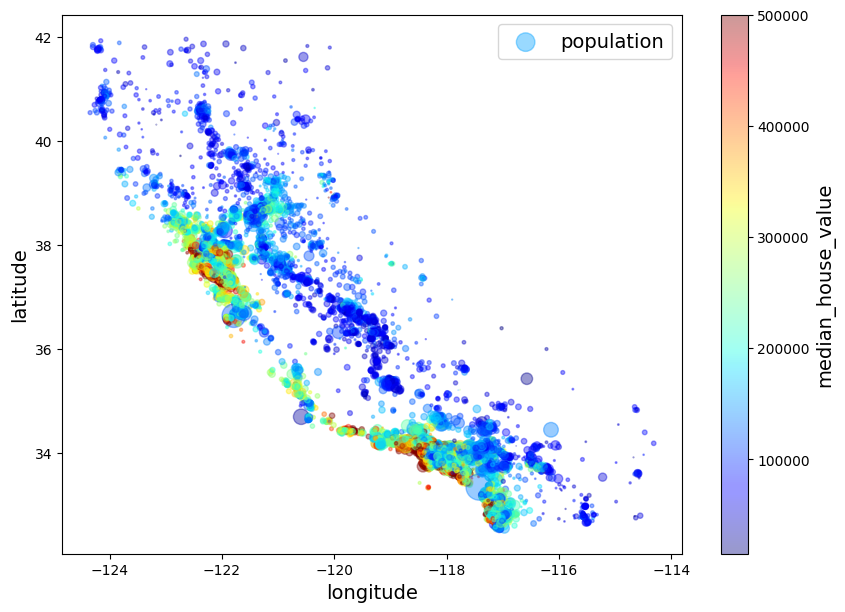

In [23]:
#Vejamos as representações dos p´reços dos imoveis
#No caso o raio do circulo representa a população e a cor representa o preço, azul valores nmais baixos e vemelhos valores mais altos
housing.plot(kind = 'scatter', x ='longitude', y= 'latitude', alpha = 0.4,
             s = housing["population"]/100, label = "population", figsize=(10,7),
             c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True)
plt.legend()    

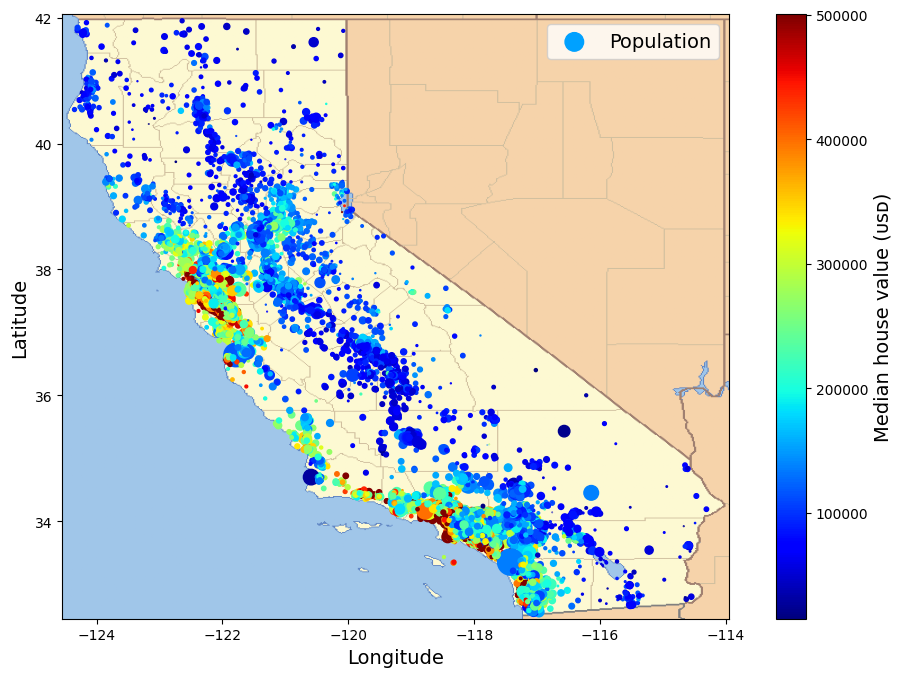

In [24]:
# extra code – this cell generates the first figure in the chapter

# Download the California image
filename = "california.png"
if not (IMAGES_PATH / filename).is_file():
    homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
    url = homl3_root + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    urllib.request.urlretrieve(url, IMAGES_PATH / filename)

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude",
             s=housing_renamed["Population"] / 100, label="Population",
             c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

california_img = plt.imread(IMAGES_PATH / filename)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

save_fig("california_housing_prices_plot")
plt.show()

In [25]:
#Exibindo a matriz de correlação 
corr_matrix = housing.corr(numeric_only=True)

In [26]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690521
total_rooms           0.138451
housing_median_age    0.100461
households            0.068652
total_bedrooms        0.053506
population           -0.021435
longitude            -0.041398
latitude             -0.148153
Name: median_house_value, dtype: float64

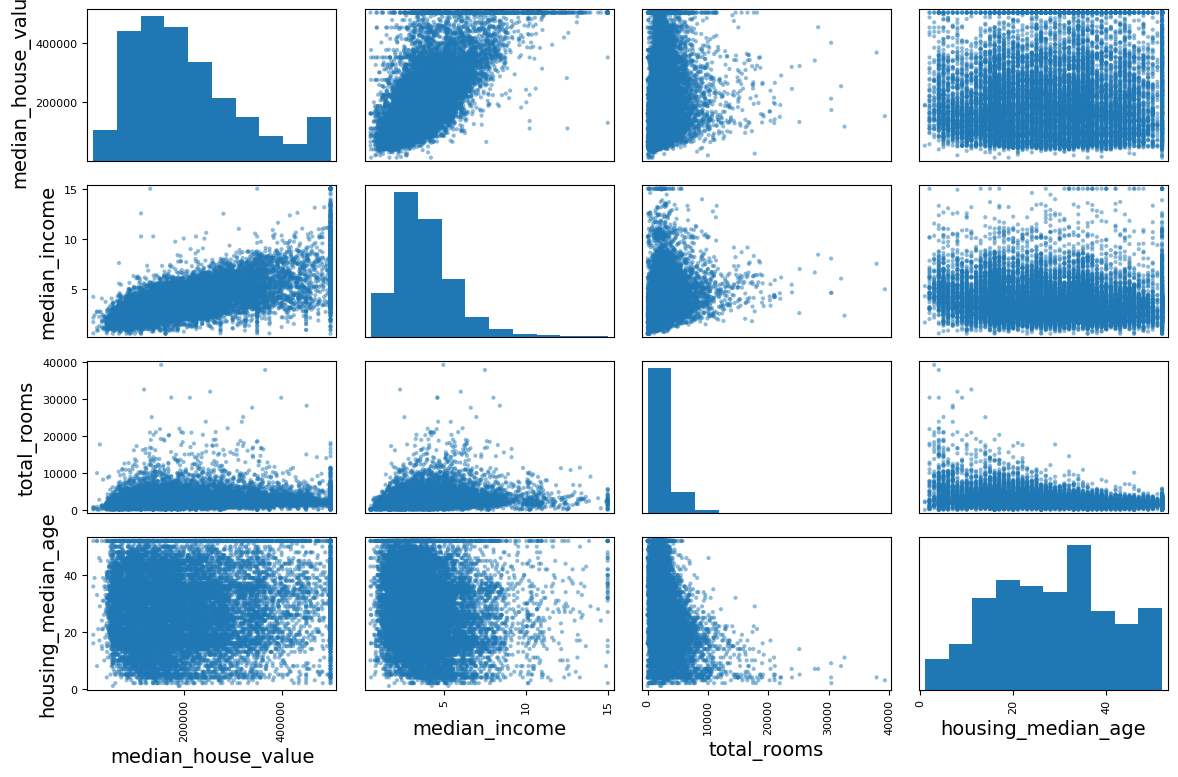

In [27]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))
save_fig("scatter_matrix_plot")
plt.show()

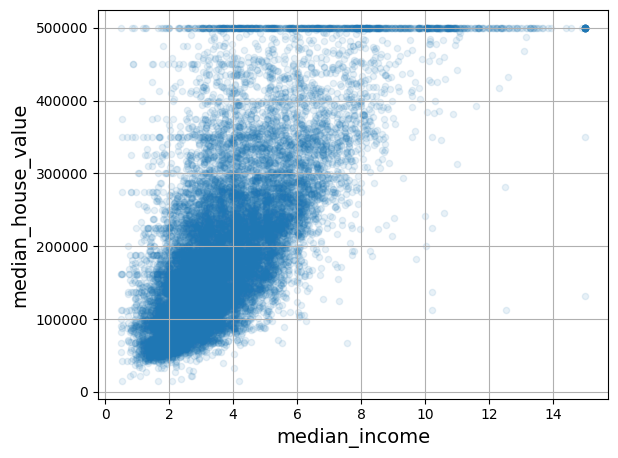

In [28]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
save_fig("income_vs_house_value_scatterplot")  # extra code
plt.show()

In [29]:
housing['rooms_per_house'] = housing['total_rooms']/housing['households']
housing['beedrooms_ratio'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_house'] = housing['population']/housing['households']

In [30]:
corr_matrix  = housing.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.690521
rooms_per_house         0.159932
total_rooms             0.138451
housing_median_age      0.100461
households              0.068652
total_bedrooms          0.053506
population             -0.021435
population_per_house   -0.022052
longitude              -0.041398
latitude               -0.148153
beedrooms_ratio        -0.255879
Name: median_house_value, dtype: float64

## ML

In [31]:
housing = strat_train_set_n.drop('median_house_value', axis=1)
housing_labels = strat_train_set_n['median_house_value'].copy()

```python
housing.dropna(subset=["total_bedrooms"], inplace=True)    # option 1

housing.drop("total_bedrooms", axis=1)       # option 2

median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
```


In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [33]:
housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)
imputer.statistics_

array([-118.48  ,   34.24  ,   29.    , 2132.5   ,  435.    , 1170.    ,
        411.    ,    3.5313])

In [34]:
housing_num.median().values

array([-118.48  ,   34.24  ,   29.    , 2132.5   ,  435.    , 1170.    ,
        411.    ,    3.5313])

In [35]:
X = imputer.transform(housing_num)
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [36]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [37]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

## Drop some outliers

In [38]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(contamination='auto', random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

In [39]:
outlier_pred

array([1, 1, 1, ..., 1, 1, 1], shape=(16512,))

In [40]:
#Drop outliers
#housing = housing.iloc[outlier_pred == 1]
#housing_labels = housing_labels.iloc[outlier_pred == 1]

In [41]:
#manipulando texto e atributos categoricos
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
19887,INLAND
9051,<1H OCEAN
2502,NEAR BAY
19903,INLAND
6129,INLAND
1776,INLAND
9590,INLAND
16475,<1H OCEAN
1429,INLAND
27,NEAR BAY


In [42]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [43]:
housing_cat_encoded[:5]


array([[1.],
       [0.],
       [3.],
       [1.],
       [1.]])

In [44]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [45]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [46]:
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [47]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], shape=(16512, 5))

In [48]:
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], shape=(16512, 5))

In [49]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [50]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [51]:
cat_encoder.transform(df_test)


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [52]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


In [53]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [54]:
cat_encoder.feature_names_in_


array(['ocean_proximity'], dtype=object)

In [55]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [ ]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)

df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


## Feature Scaling

In [57]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [58]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

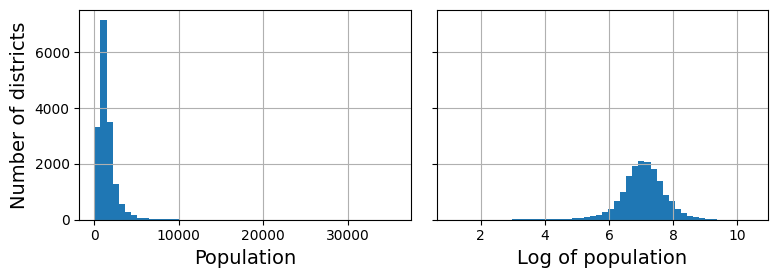

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
save_fig("long_tail_plot")
plt.show()

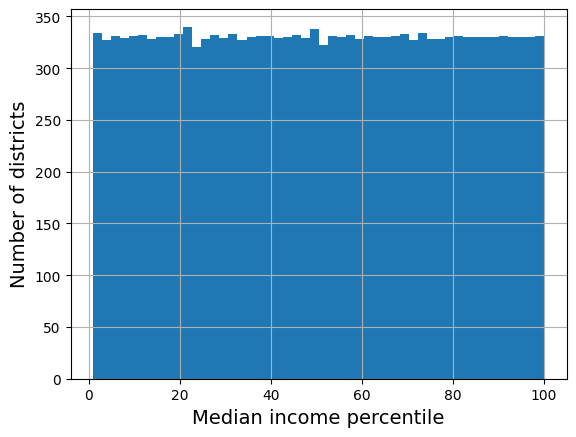

In [60]:
percentiles = [np.percentile(housing["median_income"], p)
               for p in range(1, 100)]
flattened_median_income = pd.cut(housing["median_income"],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))
flattened_median_income.hist(bins=50)
plt.xlabel("Median income percentile")
plt.ylabel("Number of districts")
plt.show()

In [61]:
from sklearn.metrics.pairwise import rbf_kernel
age_simil_35 = rbf_kernel(housing['housing_median_age'].values.reshape(-1,1), [[35]], gamma=0.1)

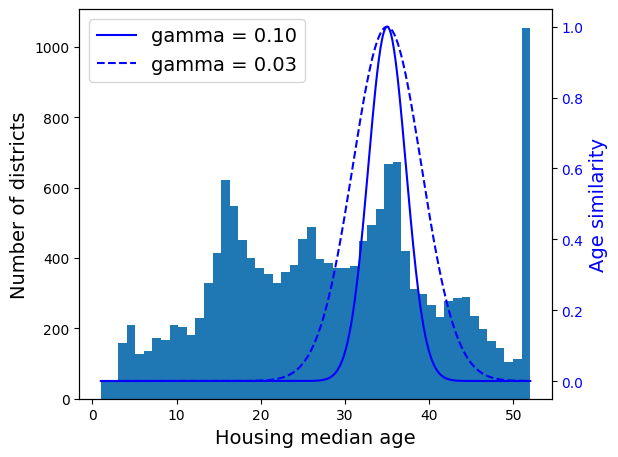

In [62]:
ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
save_fig("age_similarity_plot")
plt.show()

## Treinando um modelo


In [63]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [64]:
predictions

array([[250264.67020683],
       [125617.18993602],
       [222677.65575538],
       [363631.4949775 ],
       [154512.89422126]])

In [65]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

In [66]:
predictions

array([250264.67020683, 125617.18993602, 222677.65575538, 363631.4949775 ,
       154512.89422126])

## Custom transformers


In [67]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log1p, np.expm1)
log_pop = log_transformer.fit_transform(housing[["population"]])

In [68]:
rbf_transformer = FunctionTransformer(lambda x: rbf_kernel(x, [[35]], gamma=0.1))


In [69]:
age_simil_35

array([[5.57390369e-07],
       [6.70320046e-01],
       [2.81118530e-13],
       ...,
       [8.20849986e-02],
       [4.06569660e-01],
       [8.48904403e-15]], shape=(16512, 1))

In [70]:
sf_coords = 37.7749, - 122.41
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args = dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.fit_transform(housing[["latitude", "longitude"]])

In [71]:
sf_simil

array([[0.96245612],
       [0.0443537 ],
       [0.9999378 ],
       ...,
       [0.03235089],
       [0.0369874 ],
       [0.82220214]], shape=(16512, 1))

In [72]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

In [73]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

In [74]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [75]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Substitua "4" pelo número de núcleos desejado


In [76]:
!pip install --upgrade joblib loky


In [77]:
import warnings
warnings.filterwarnings("ignore", message="Could not find the number of physical cores")


In [78]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
                                           sample_weight=housing_labels)

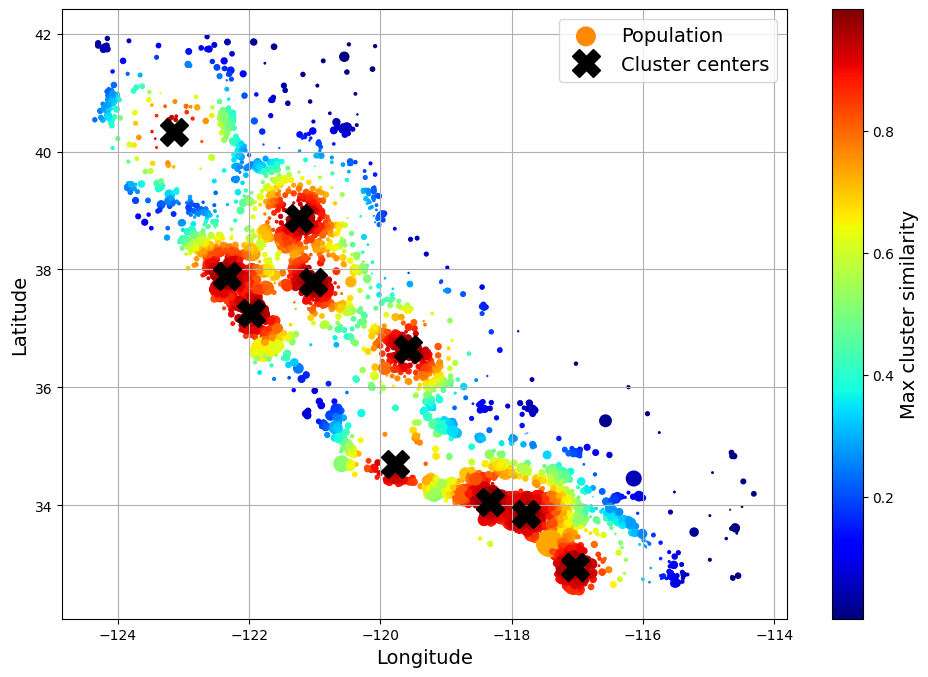

In [79]:
# extra code – this cell generates Figure 2–19

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
save_fig("district_cluster_plot")
plt.show()


## Transformation Pipelines

In [80]:
# Pipeline to preprocess the numerical attributes
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler())
])

In [81]:
from sklearn.pipeline import make_pipeline
num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             StandardScaler())

In [82]:
from sklearn import set_config

set_config(display = 'diagram')
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [83]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.14,  1.11, -0.45, -0.68, -0.86, -0.75, -0.85,  0.55],
       [ 0.68, -0.7 ,  0.66, -0.27,  0.18,  0.23,  0.12, -1.01]])

In [84]:
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, columns = num_pipeline.get_feature_names_out(),
    index = housing_num.index)


In [85]:
df_housing_num_prepared.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
19887,-1.137750,1.112768,-0.446391,-0.679749,-0.864906,-0.745193,-0.849731,0.547198
9051,0.676708,-0.704752,0.663897,-0.273449,0.176006,0.231999,0.115303,-1.014660


In [86]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

In [87]:
num_pipeline.set_params(simpleimputer__strategy='median')


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [88]:
from sklearn.compose import ColumnTransformer

num_attribs = housing_num.columns.tolist()
cat_attribs = ['ocean_proximity']

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])                              


In [89]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)

In [90]:
housing_prepared = preprocessing.fit_transform(housing)

In [91]:
housing_prepared_fr = pd.DataFrame(
    housing_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=housing.index)
housing_prepared_fr.head(2)

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
19887,-1.137750,1.112768,-0.446391,-0.679749,-0.864906,-0.745193,-0.849731,0.547198,0.0,1.0,0.0,0.0,0.0
9051,0.676708,-0.704752,0.663897,-0.273449,0.176006,0.231999,0.115303,-1.014660,1.0,0.0,0.0,0.0,0.0


In [92]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [93]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 24)

In [94]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

## Training and Evaluating on the training set


In [95]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C679B63CD0>)])),
                ('linearregression', LinearRegression())])

In [96]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)

array([222200., 159800., 307000., 287900., 117000.])

In [97]:
housing_labels[:5].values

array([152400., 166300., 455400., 341700., 198500.])

In [98]:
error_ratios = housing_predictions[:5].round(-2) / housing_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

45.8%, -3.9%, -32.6%, -15.7%, -41.1%


In [99]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate the mean squared error (MSE)
mse = mean_squared_error(housing_labels, housing_predictions)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

rmse


np.float64(69225.09276965464)

In [100]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C679B63CD0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [101]:
hosuing_predictions = tree_reg.predict(housing)

# BEter Evaluate Using Cross-Validation


In [102]:
from sklearn.model_selection import cross_val_score

scores = -cross_val_score(tree_reg, housing, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)

In [103]:
pd.Series(np.sqrt(scores)).describe()

count       10.000000
mean     66098.744677
std       1826.149112
min      63551.418392
25%      64716.742376
50%      65979.829764
75%      67387.489482
max      69215.992490
dtype: float64

In [104]:

#computes the error stats for the linear model
lin_rmses = -cross_val_score(lin_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count       10.000000
mean     70258.074544
std       2555.811040
min      66169.471555
25%      68878.989274
50%      69630.415893
75%      71776.707497
max      75498.254344
dtype: float64

In [105]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [106]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     46765.613120
std       1794.404373
min      43395.165807
25%      45985.587099
50%      46499.740746
75%      47871.860273
max      49967.029759
dtype: float64

In [107]:
forest_reg.fit(housing, housing_labels)
housing_predictions = forest_reg.predict(housing)
forest_rmse = np.sqrt(mean_squared_error(housing_labels, housing_predictions))
forest_rmse

np.float64(17374.10195356043)

The training error is much lower than the validation error, which usually means that the model has overfit the training set. Another possible explanation may be that there's a mismatch between the training data and the validation data, but it's not the case here, since both came from the same dataset that we shuffled and split in two parts.

## Fine-tune Your model

```markdown
## Fine-tune Your Model

O processo de ajuste fino (fine-tuning) de um modelo de machine learning envolve a otimização dos hiperparâmetros do modelo para melhorar seu desempenho. Isso pode ser feito através de várias técnicas, como:

1. **Grid Search**: Testa exaustivamente todas as combinações possíveis de hiperparâmetros especificados.
2. **Random Search**: Testa um número fixo de combinações aleatórias de hiperparâmetros.
3. **Bayesian Optimization**: Utiliza métodos probabilísticos para encontrar a combinação ideal de hiperparâmetros de forma mais eficiente.

Durante o ajuste fino, é comum utilizar validação cruzada para avaliar o desempenho do modelo em diferentes subconjuntos dos dados de treinamento, garantindo que o modelo generalize bem para dados não vistos. O objetivo é encontrar a configuração de hiperparâmetros que minimize o erro de validação, resultando em um modelo mais robusto e preciso.
```

In [ ]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('random_forest', RandomForestRegressor(random_state=42))
])

param_grid = [
    {'preprocessing__geo__n_clusters': [5,8,10, 20],
    'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [5,8,10, 15,20],
     'random_forest__max_features': [4, 6, 8,10]},
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True)

grid_search.fit(housing, housing_labels)

In [ ]:
full_pipeline.get_params().keys()

In [ ]:
#The best combination
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# extra code – these few lines of code just make the DataFrame look nicer
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

## Randomized Search

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo_n_clusters': randint(3, 50),
                  'random_forest__max_features': randint(2, 20)}

rnd_search  = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs,n_iter = 10, cv =3,
    scoring='neg_root_mean_squared_error', random_state=42)
)

rnd_search.fit(housing, housing_labels)
                  

In [ ]:
#display the random search results

cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)
cv_res.head()

## Analyse the best models and their errors

In [ ]:
final_model = rnd_search.best_estimator_ # includes preprocessing
feature_importance = final_model['random_forest'].feature_importances_
feature_importance.round(2)

##Evaluate your system on the test

In [ ]:
X_test = strat_test_set_n.drop("median_house_value", axis=1)
y_test = strat_test_set_n["median_house_value"].copy()
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_mse

## Model persistnece using joblib


In [ ]:
import joblib
joblib.dump(final_model, "final_model.pkl")

Now we can deploy this model to prediction. For example, the following code could be script that would run in production:

In [ ]:
import joblib
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

#class ClusterSimilarity(BaseEstimator, TransformerMixin):
#    [...]

final_model_reloaded = joblib.load("my_california_housing_model.pkl")

new_data = housing.iloc[:5]  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)

## Exercicios